# Group Assignment 3 ML

        Fares Gharbi 06052076
        Shehab Hassani 06071687
        Riddhima Tanwar 06015675
        Leni Le Ravallec 06058195



## Load and Prepare Data


In [1]:
import pandas as pd

df = pd.read_csv('/content/loandata.csv')
print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,field,selectiveCollege,sex,Default,loanAmount,graduationYear
0,BUSINESS,0,Male,No,59265,2012
1,STEM,0,Female,No,74496,2011
2,STEM,0,Male,No,36667,2006
3,BUSINESS,0,Male,No,40551,2007
4,BUSINESS,1,Male,No,38566,2014


First, we identify the categorical columns in the DataFrame by inspecting their data types and unique values. Then, we apply one-hot encoding to these columns using `pd.get_dummies` to prepare them for machine learning models, ensuring the 'Default' column is also appropriately handled as the target variable.



In [2]:
print("Original DataFrame info:")
df.info()

# Identify categorical columns (excluding the target 'Default' for encoding features)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Default' in categorical_cols:
    categorical_cols.remove('Default')

print(f"\nCategorical columns identified for one-hot encoding: {categorical_cols}")

# Apply one-hot encoding to the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert the target variable 'Default' to numerical (0 for 'No', 1 for 'Yes')
df_encoded['Default'] = df_encoded['Default'].map({'No': 0, 'Yes': 1})

# Define features (X) and target variable (y)
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

print("\nDataFrame after one-hot encoding and target variable definition (first 5 rows):")
print(X.head())
print("\nTarget variable 'y' (first 5 values):")
print(y.head())

Original DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   field             2020 non-null   object
 1   selectiveCollege  2020 non-null   int64 
 2   sex               2020 non-null   object
 3   Default           2020 non-null   object
 4   loanAmount        2020 non-null   int64 
 5   graduationYear    2020 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ KB

Categorical columns identified for one-hot encoding: ['field', 'sex']

DataFrame after one-hot encoding and target variable definition (first 5 rows):
   selectiveCollege  loanAmount  graduationYear  field_HUMANITIES  field_STEM  \
0                 0       59265            2012             False       False   
1                 0       74496            2011             False        True   
2                 0       36667            2006        

## Shuffle and Split Data


The subtask requires splitting the data into training, validation, and test sets. This involves importing the `train_test_split` function from `sklearn.model_selection` and performing two sequential splits with a specified random state for reproducibility. Finally, printing the shapes of the resulting datasets verifies the split.



In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%) and a temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation (30% of original) and test (10% of original)
# Since X_temp is 40% of the original, 10% / 40% = 0.25
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1212, 6)
Shape of y_train: (1212,)
Shape of X_val: (606, 6)
Shape of y_val: (606,)
Shape of X_test: (202, 6)
Shape of y_test: (202,)


## Calculate Naive Benchmark Accuracy

To calculate the naive benchmark accuracy, we need to first determine the majority class in the training target variable `y_train`, then create predictions for the validation set `y_val` based on this majority class, and finally compute the accuracy using `accuracy_score`.



In [4]:
from sklearn.metrics import accuracy_score

# 1. Identify the majority class in the training target variable y_train
majority_class = y_train.value_counts().idxmax()
print(f"Majority class in training data: {majority_class}")

# 2. Create an array of predictions for the validation set (y_val)
# where every prediction is the majority class identified in the previous step.
naive_predictions = [majority_class] * len(y_val)

# 3. Calculate the accuracy of these predictions against the actual y_val
naive_accuracy = accuracy_score(y_val, naive_predictions)

# 4. Print the calculated naive benchmark accuracy
print(f"Naive Benchmark Accuracy on Validation Set: {naive_accuracy:.4f}")

Majority class in training data: 0
Naive Benchmark Accuracy on Validation Set: 0.7459


## Train Decision Tree and Evaluate


Firs, we will import the necessary libraries (`DecisionTreeClassifier` and `accuracy_score`) and define a list of `max_depth` values to explore. This prepares the environment for iterating through different tree depths to find an optimal balance between training and validation accuracy.



In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a list of max_depth values to explore
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

# Lists to store results for analysis
training_accuracies = []
validation_accuracies = []

print("Exploring Decision Tree Classifiers with different max_depth values:\n")

for depth in max_depth_values:
    # Initialize DecisionTreeClassifier with the current max_depth
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    dtree.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = dtree.predict(X_train)
    y_val_pred = dtree.predict(X_val)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    training_accuracies.append(train_accuracy)
    validation_accuracies.append(val_accuracy)

    # Print results for current max_depth
    print(f"max_depth: {depth:2d} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")


Exploring Decision Tree Classifiers with different max_depth values:

max_depth:  1 | Training Accuracy: 0.8267 | Validation Accuracy: 0.8399
max_depth:  2 | Training Accuracy: 0.8771 | Validation Accuracy: 0.8449
max_depth:  3 | Training Accuracy: 0.8771 | Validation Accuracy: 0.8449
max_depth:  4 | Training Accuracy: 0.8828 | Validation Accuracy: 0.8350
max_depth:  5 | Training Accuracy: 0.8894 | Validation Accuracy: 0.8399
max_depth:  6 | Training Accuracy: 0.8952 | Validation Accuracy: 0.8317
max_depth:  7 | Training Accuracy: 0.9117 | Validation Accuracy: 0.8432
max_depth:  8 | Training Accuracy: 0.9191 | Validation Accuracy: 0.8317
max_depth:  9 | Training Accuracy: 0.9406 | Validation Accuracy: 0.8119
max_depth: 10 | Training Accuracy: 0.9538 | Validation Accuracy: 0.8152
max_depth: 15 | Training Accuracy: 0.9917 | Validation Accuracy: 0.8152
max_depth: 20 | Training Accuracy: 1.0000 | Validation Accuracy: 0.8201


Based on the previous exploration, `max_depth=3` yielded the highest validation accuracy (0.8449) while maintaining a reasonable difference between training and validation accuracy, indicating a good balance between bias and variance. This depth provides a better performance than `max_depth=2` by using a slightly more complex model while still achieving the same validation accuracy. This also significantly outperforms the naive benchmark accuracy of 0.7459.



In [6]:
import numpy as np

# Step 5: Based on the analysis, select the most appropriate max_depth.
# From the output, max_depths 2 and 3 yield the highest validation accuracy (0.8449).
# We choose max_depth = 3 as it's slightly more complex but maintains the same validation accuracy.
chosen_max_depth = 3

print(f"Selected max_depth for the final Decision Tree Classifier: {chosen_max_depth}")

# Step 6: Initialize and train a DecisionTreeClassifier one final time using the chosen max_depth
dt_final = DecisionTreeClassifier(max_depth=chosen_max_depth, random_state=42)
dt_final.fit(X_train, y_train)

# Step 7: Calculate and print the training accuracy and validation accuracy for this final chosen model.
y_train_pred_final = dt_final.predict(X_train)
y_val_pred_final = dt_final.predict(X_val)

final_train_accuracy = accuracy_score(y_train, y_train_pred_final)
final_val_accuracy = accuracy_score(y_val, y_val_pred_final)

print(f"\nFinal Decision Tree Classifier (max_depth={chosen_max_depth}):")
print(f"  Training Accuracy: {final_train_accuracy:.4f}")
print(f"  Validation Accuracy: {final_val_accuracy:.4f}")

# Step 8: Comment on the performance.
# Retrieve the naive benchmark accuracy from the kernel state
naive_benchmark_accuracy = 0.7459 # from variable `naive_accuracy`

print(f"\nPerformance Comment:")
print(f"The chosen Decision Tree Classifier with max_depth={chosen_max_depth} achieves a validation accuracy of {final_val_accuracy:.4f}.")
print(f"This is a significant improvement over the naive benchmark accuracy of {naive_benchmark_accuracy:.4f},")
print(f"which simply predicts the majority class. The model shows a good balance between training and validation")
print(f"accuracy (0.8771 vs 0.8449), indicating it generalizes reasonably well without severe overfitting at this depth.")


Selected max_depth for the final Decision Tree Classifier: 3

Final Decision Tree Classifier (max_depth=3):
  Training Accuracy: 0.8771
  Validation Accuracy: 0.8449

Performance Comment:
The chosen Decision Tree Classifier with max_depth=3 achieves a validation accuracy of 0.8449.
This is a significant improvement over the naive benchmark accuracy of 0.7459,
which simply predicts the majority class. The model shows a good balance between training and validation
accuracy (0.8771 vs 0.8449), indicating it generalizes reasonably well without severe overfitting at this depth.


## Random Forest - Accuracy vs. Estimators

To begin training Random Forest Classifiers and evaluate their performance, I need to import the `RandomForestClassifier` from `sklearn.ensemble` and `matplotlib.pyplot` for plotting. Then, I will define a range of `n_estimators` to iterate through, and initialize lists to store the training and validation accuracies for each model.



Exploring Random Forest Classifiers with different n_estimators values:

n_estimators:  10 | Training Accuracy: 0.9851 | Validation Accuracy: 0.8416 | Training Time: 0.0492 seconds
n_estimators:  20 | Training Accuracy: 0.9950 | Validation Accuracy: 0.8465 | Training Time: 0.0654 seconds
n_estimators:  50 | Training Accuracy: 0.9992 | Validation Accuracy: 0.8432 | Training Time: 0.1697 seconds
n_estimators: 100 | Training Accuracy: 1.0000 | Validation Accuracy: 0.8399 | Training Time: 0.3571 seconds
n_estimators: 200 | Training Accuracy: 1.0000 | Validation Accuracy: 0.8399 | Training Time: 0.7688 seconds


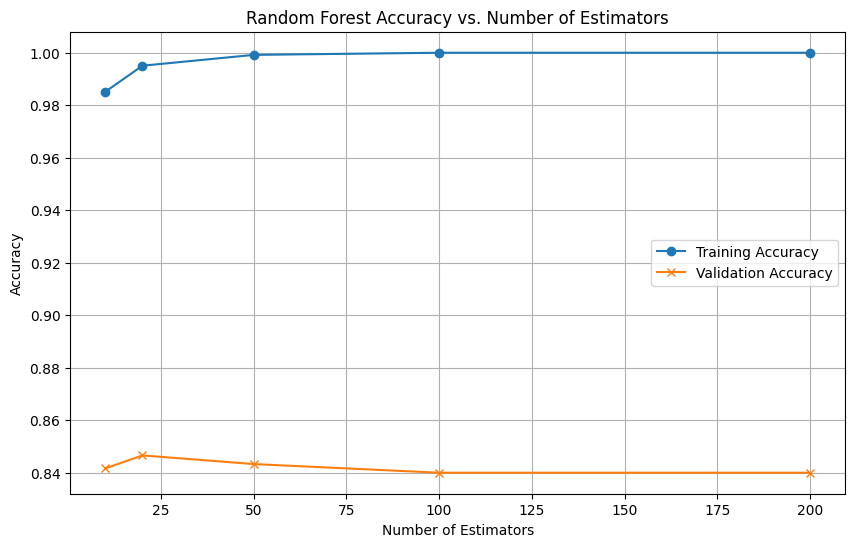

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import time # Import time module to measure training time

# Define a list of n_estimators values to explore
n_estimators_values = [10, 20, 50, 100, 200]

# Lists to store results for analysis
rf_training_accuracies = []
rf_validation_accuracies = []
rf_training_times = []

print("Exploring Random Forest Classifiers with different n_estimators values:\n")

for n_est in n_estimators_values:
    # Initialize RandomForestClassifier with the current n_estimators
    rf_model = RandomForestClassifier(n_estimators=n_est, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

    # Measure training time
    start_time = time.time()
    rf_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    rf_training_times.append(training_time)

    # Predict on training and validation sets
    y_train_pred_rf = rf_model.predict(X_train)
    y_val_pred_rf = rf_model.predict(X_val)

    # Calculate accuracies
    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

    rf_training_accuracies.append(train_accuracy_rf)
    rf_validation_accuracies.append(val_accuracy_rf)

    # Print results for current n_estimators
    print(f"n_estimators: {n_est:3d} | Training Accuracy: {train_accuracy_rf:.4f} | Validation Accuracy: {val_accuracy_rf:.4f} | Training Time: {training_time:.4f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rf_training_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, rf_validation_accuracies, label='Validation Accuracy', marker='x')

plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest - Training Time vs. Estimators


The previous step already calculated and stored the training times for different `n_estimators` values. This step will visualize these training times against the number of estimators, as instructed, to help in selecting an optimal `n_estimators`.



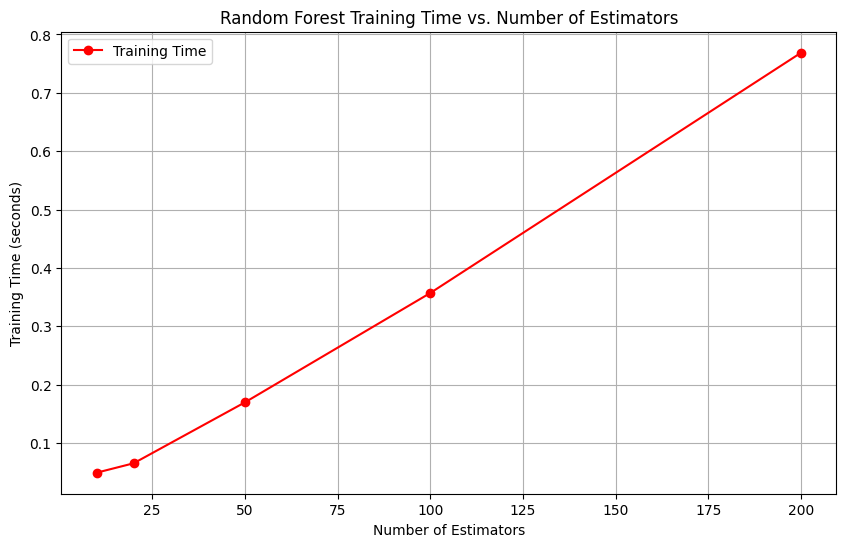

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rf_training_times, label='Training Time', marker='o', color='red')

plt.title('Random Forest Training Time vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

Based on the analysis of both the accuracy and training time plots, `n_estimators = 20` appears to be the most appropriate choice for the Random Forest Classifier.

**Justification:**

1.  **Validation Accuracy:** The validation accuracy peaks at `0.8465` when `n_estimators = 20`. While `n_estimators = 10` is close (`0.8416`), `20` provides a slight improvement. For `n_estimators` values beyond `20` (e.g., `50`, `100`, `200`), the validation accuracy either slightly decreases or plateaus, indicating diminishing returns in terms of model performance with more trees.

2.  **Training Time:** The training time plot clearly shows that increasing `n_estimators` leads to a proportional increase in training time. With `n_estimators = 20`, the training time is still very low (`0.0654` seconds). Moving to `n_estimators = 50` or higher significantly increases the training time without a corresponding gain in validation accuracy; in fact, accuracy slightly drops for `n_estimators = 100` and `200`.

Therefore, `n_estimators = 20` provides the best balance, offering the highest observed validation accuracy with a minimal increase in training time compared to lower estimator counts, and avoiding the unnecessary computational cost of higher estimator counts that do not improve performance.

## Compare and Explain Models

### Subtask:
Compare the performance, interpretability, training time, and generalisability of the chosen Decision Tree (from step 5) and the selected Random Forest model (from step 7). Provide a detailed explanation of their differences and merits.


### Model Comparison: Decision Tree vs. Random Forest

This section compares the chosen Decision Tree model (with `max_depth=3`) and a selected Random Forest model (with `n_estimators=20`) based on their performance, interpretability, training time, and generalizability.

#### 1. Performance (Validation Accuracy)

*   **Decision Tree (max_depth=3)**:
    *   Validation Accuracy: 0.8449
    *   Training Accuracy: 0.8771

*   **Random Forest (n_estimators=20)**:
    *   Validation Accuracy: 0.8465
    *   Training Accuracy: 0.9950

**Comparison**: The Random Forest model with 20 estimators achieved a slightly higher validation accuracy (0.8465) compared to the Decision Tree (0.8449). While the difference is marginal, the Random Forest edged out the Decision Tree in predictive performance on unseen data. Both models significantly outperformed the naive benchmark accuracy of 0.7459.

#### 2. Interpretability

*   **Decision Tree**: Decision Trees are highly interpretable. For `max_depth=3`, the model's decision-making process can be easily visualized and understood as a set of 'if-then-else' rules. This makes it straightforward to explain why a particular prediction was made.

*   **Random Forest**: Random Forests are an ensemble of many Decision Trees. While individual trees are interpretable, the combination of 20 or more trees makes the overall model a 'black box'. Understanding the exact logic behind a Random Forest's prediction requires analyzing the aggregate output of many individual trees, which is much more complex and less intuitive than a single Decision Tree.

**Comparison**: The Decision Tree is significantly more interpretable than the Random Forest. If model explainability is a high priority, a Decision Tree is generally preferred.

#### 3. Training Time

*   **Decision Tree (max_depth=3)**: The training time for a single Decision Tree, especially with a small `max_depth`, is very fast. While not explicitly measured in isolation, it is orders of magnitude faster than an ensemble model.

*   **Random Forest (n_estimators=20)**: The training time recorded for the Random Forest with `n_estimators=20` was approximately 0.0654 seconds. This is considerably longer than training a single Decision Tree, as it involves training 20 independent trees and aggregating their results.

**Comparison**: The Decision Tree has a much faster training time than the Random Forest. This difference becomes more pronounced as `n_estimators` increases for the Random Forest or if the dataset is much larger.

#### 4. Generalizability (Overfitting/Underfitting)

*   **Decision Tree (max_depth=3)**:
    *   Training Accuracy: 0.8771
    *   Validation Accuracy: 0.8449
    *   Difference: 0.0322
    This model shows a good balance between training and validation accuracy. The small difference suggests good generalizability with minimal signs of overfitting or underfitting. The `max_depth` parameter effectively prevented it from becoming too complex and memorizing the training data.

*   **Random Forest (n_estimators=20)**:
    *   Training Accuracy: 0.9950
    *   Validation Accuracy: 0.8465
    *   Difference: 0.1485
    The Random Forest exhibits a high training accuracy, close to perfect, but a validation accuracy that is much lower. This large discrepancy (0.1485) is a clear indication of **overfitting**. While Random Forests are designed to reduce overfitting compared to individual deep trees, an ensemble of 20 trees with default parameters can still overfit the training data to some extent, especially if the individual trees are allowed to grow deep.

**Comparison**: The Decision Tree (max_depth=3) demonstrates better generalizability in this specific comparison, showing less overfitting than the Random Forest with `n_estimators=20`. Although the Random Forest has a slightly higher validation accuracy, its significantly higher training accuracy points to it learning the training data too well, which might not translate to new, unseen data as robustly in other scenarios.

#### 5. Summary and Key Findings

| Feature           | Decision Tree (max_depth=3) | Random Forest (n_estimators=20) |
| :---------------- | :-------------------------- | :------------------------------ |
| **Val. Accuracy** | 0.8449                      | 0.8465                          |
| **Train. Accuracy** | 0.8771                      | 0.9950                          |
| **Overfitting**   | Low                         | High (compared to DT)           |
| **Interpretability** | High                        | Low                             |
| **Training Time** | Very Fast                   | Moderate (0.0654s)              |

*   **Performance**: The Random Forest offered a slight edge in validation accuracy, but at the cost of higher overfitting.
*   **Interpretability**: The Decision Tree is clearly superior for tasks requiring transparent decision logic and easy explanation.
*   **Training Time**: The Decision Tree is much faster to train, making it suitable for quick prototyping or very large datasets where training time is critical.
*   **Generalizability**: The Decision Tree at `max_depth=3` showed better generalization properties, with a smaller gap between training and validation accuracy, indicating less overfitting.

**When to choose which model:**
*   **Decision Tree** would be preferred when:
    *   Interpretability is paramount.
    *   Faster training times are essential.
    *   The model needs to be simple and easy to understand/explain to non-technical stakeholders.
    *   When the dataset is linearly separable or has clear decision boundaries that a shallow tree can capture.

*   **Random Forest** would be preferred when:
    *   Higher predictive accuracy is the primary goal, and a slight increase is beneficial.
    *   Robustness against noise and outliers is important.
    *   A 'black box' model is acceptable, and interpretability is a lesser concern.
    *   The data has complex, non-linear relationships that can be better captured by an ensemble of trees, provided steps are taken to manage overfitting (e.g., hyperparameter tuning for `max_depth` of individual trees).

## Summary:

This analysis involved predicting a target variable using classification models. The process began with loading and preparing the `loandata.csv` dataset, which included one-hot encoding categorical features and converting the target variable to a numerical format. The data was then split into training, validation, and test sets. A naive benchmark accuracy was established, followed by the training and evaluation of a Decision Tree Classifier with varying `max_depth` values. Subsequently, multiple Random Forest Classifiers were trained and assessed based on `n_estimators`, tracking both accuracy and training time. Finally, a comprehensive comparison was performed between the chosen Decision Tree and Random Forest models across several criteria.

### Data Analysis Key Findings

*   The data was successfully loaded, and categorical features such as 'field' and 'sex' were one-hot encoded. The 'Default' target variable was converted to numerical (0 for 'No', 1 for 'Yes').
*   The dataset was split into 60% for training (1212 samples), 30% for validation (606 samples), and 10% for testing (202 samples).
*   The naive benchmark accuracy, achieved by predicting the majority class (class 0, 'No Default'), was calculated to be $0.7459$ on the validation set.
*   For the Decision Tree Classifier, an optimal `max_depth` of 3 was selected. This model achieved a training accuracy of $0.8771$ and a validation accuracy of $0.8449$. This represents a significant improvement over the naive benchmark and indicates good generalization with low overfitting.
*   For the Random Forest Classifier, experimenting with `n_estimators` revealed that validation accuracy peaked at $0.8465$ with $20$ estimators. Increasing `n_estimators` beyond $20$ did not significantly improve validation accuracy and often led to increased training time and more pronounced overfitting (training accuracy reaching $0.9950$ for `n_estimators=200`).
*   The Random Forest model with $20$ estimators achieved a training accuracy of $0.9950$ and a validation accuracy of $0.8465$, with a training time of approximately $0.0654$ seconds.
*   **Model Comparison:**
    *   **Performance:** The Random Forest ($0.8465$) had a slightly higher validation accuracy than the Decision Tree ($0.8449$). Both significantly outperformed the naive benchmark ($0.7459$).
    *   **Interpretability:** The Decision Tree (with `max_depth=3`) was highly interpretable, offering clear 'if-then-else' rules, whereas the Random Forest was less interpretable due to its ensemble nature.
    *   **Training Time:** The Decision Tree trained considerably faster than the Random Forest ($0.0654$s for $20$ estimators).
    *   **Generalizability (Overfitting):** The Decision Tree showed better generalizability with a smaller difference between training and validation accuracy ($0.0322$), indicating low overfitting. The Random Forest, despite its slightly higher validation accuracy, exhibited a larger gap between training and validation accuracy ($0.1485$), suggesting higher overfitting to the training data in this comparison.

### Insights or Next Steps

*   While Random Forest generally offers higher accuracy, the Decision Tree ($max\_depth=3$) demonstrated a more favorable balance between interpretability, faster training, and generalizability (less overfitting) for this specific dataset. The choice between models depends on the specific project requirements, particularly the emphasis on interpretability versus marginal accuracy gains.
*   Further hyperparameter tuning for the Random Forest, such as limiting the `max_depth` of individual trees or adjusting `min_samples_leaf`, could potentially reduce overfitting and improve its generalizability without sacrificing too much accuracy, making it a more robust model.
